<a href="https://colab.research.google.com/github/mehdihatami1998/DynamicsOfStructures/blob/main/L00_FreeVibrationTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Free Vibration Test

Our aim is to _simulate_ a free vibration test, where we impose a static displacement to a structure that can be regarded as a single degree of freedom system, then release the static force and measure, as a function of time, the displacements during the insuing free vibrations.

## Preliminaries

Many functionalities are separated from the core of the language, we need to `import` what we need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## The system we want to simulate

First the mass, the stiffness, the damping ratio, next we derive all the dependant parameters, $\omega_n^2$, $\omega_n$, $T_n$, the damping constant $c$, the damped circular frequecy and the corresponding period, $\omega_D$ and $T_D$.

In [2]:
m = 100.0
k = 1600.0
z = 0.06

wn2 = k/m
wn = np.sqrt(wn2)
Tn = 2*np.pi/wn

c = 2*m*wn*z
wd = wn*np.sqrt(1-z**2)
Td = 2*np.pi/wd

## The simulation

We imagine to subject the system to a static force $F=80$ N, we compute the initial displacement $x_0$ (it is $\dot{x}_0=0$) and subsequently we define an array of time instants and two arrays, with the "exact" displacements and velocities computed in the instants of time previously defined.

In [3]:
F = 80
x0 = F/k

t = np.linspace(0, 5.2*Td, 1001) 
x = np.exp(-z*wn*t)*x0*(np.cos(wd*t)+z*wn*np.sin(wd*t)/wd)
v = -x0*np.exp(-z*wn*t)*np.sin(wd*t)*(wn**2*z**2+wd**2)/wd                        

We plot the displacements and the velocities, find the positive peaks, adding also the initial value (we find the _indices_ of the positive peaks) and add on the displacements the position of the dots.

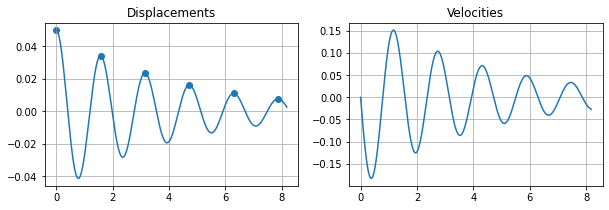

In [4]:
fig, (ax_x, ax_v) = plt.subplots(1, 2, figsize=(10,3))
ax_x.plot(t, x) ; ax_x.set_title('Displacements')
ax_v.plot(t, v) ; ax_v.set_title('Velocities')
ax_x.grid(1) ; ax_v.grid(1)

imx = np.concatenate(([0],find_peaks(x)[0]))
ax_x.scatter(t[imx], x[imx])

Let's see the instants of the maxima and their values

In [5]:
with np.printoptions(precision=4):
    print(np.vstack((t[imx], x[imx])))


[[0.0000e+00 1.5711e+00 3.1504e+00 4.7215e+00 6.2926e+00 7.8719e+00]
 [5.0000e-02 3.4271e-02 2.3491e-02 1.6103e-02 1.1038e-02 7.5651e-03]]


Finally we apply the iterative formula three times to see that we converge to the actual (almost) value of the damping ratio.
A small discrepance is due to the fact that we don't know the value of $x_5$c but only the value computed in a point close to the location of the maximum, due to the fact that we are limited to _sampling_ the time axis and computing the response in a finite set of instants, and not as a continuous function of time.

In [6]:
z = 0
for _ in range(3):
    z = np.log(0.050/x[962])/(2*5*np.pi)*np.sqrt(1-z*z)
    print(z)

0.06011192261230503
0.06000321881447677
0.060003611963992384
